In [241]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [81]:
application_record = pd.read_csv("application_record.csv")
application_record.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [181]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [82]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [83]:
application_record.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [187]:
np.quantile(application_record["AMT_INCOME_TOTAL"],.25)

121500.0

In [85]:
application_record["FLAG_WORK_PHONE"].unique()


array([1, 0], dtype=int64)

In [86]:
application_record["FLAG_EMAIL"].unique()

array([0, 1], dtype=int64)

In [87]:
application_record["FLAG_PHONE"].unique()

array([0, 1], dtype=int64)

In [89]:
application_record["DAYS_BIRTH"] = (application_record["DAYS_BIRTH"]/-365) ## Here i am converting birthday in years

In [95]:
## according to person income and here i am checking persong is working or not. then i choose the good_customer
good_customer = application_record.iloc[np.where((application_record["DAYS_EMPLOYED"]<0)&(application_record["AMT_INCOME_TOTAL"]>=121500.0))]

In [108]:
bad_customer.shape

(29579, 18)

In [98]:
good_customer.shape

(285630, 18)

In [100]:
application_record.shape

(438557, 18)

In [101]:
application_record["DAYS_EMPLOYED"].describe()

count    438557.000000
mean      60563.675328
std      138767.799647
min      -17531.000000
25%       -3103.000000
50%       -1467.000000
75%        -371.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [144]:
## here i am separating the bad_customer 
good_customer_index = np.where((application_record["DAYS_EMPLOYED"]<0)&(application_record["AMT_INCOME_TOTAL"]>=121500.0))
good_customer_index[0]
bad_index = []
all_index = np.arange(0,438558)
for i in np.arange(0,438558):
    if i not in good_customer_index[0]:
        bad_index.append(i)

In [166]:
final_bad_index = np.array(bad_index,dtype="int64")
final_bad_index[:-1]

array([     2,      7,      8, ..., 438553, 438554, 438555], dtype=int64)

In [159]:
good_customer_index[0]

array([     0,      1,      3, ..., 438547, 438548, 438556], dtype=int64)

In [168]:
good_customer_data = application_record.iloc[good_customer_index]

In [169]:
bad_customer_data = application_record.iloc[final_bad_index[:-1]]

In [170]:
good_customer_data["good_bad_customer"] = 1 # assign the value to good customer

In [172]:
bad_customer_data["good_bad_customer"] = 0 ## assign the value to bad customer

In [174]:
new_data = pd.concat([good_customer_data,bad_customer_data]) ## concat the good bad customers

In [178]:
new_data.sort_index(inplace=True) ## sorting the values

In [179]:
new_data

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment   32.890411          -4542   
1             Civil marriage   Rented apartment   32.890411          -4542   
2                    Married  House / apartment   58.832877          -1134   
3       Single / not married  House / apartment   52.356164          -3051   
4       Single / not married  House / apartment   52.356164          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment   62.238356         365243   
438553  Single / not married  House / apartment   43.668493          -3007   
438554  Single / not married       With parents   22.380822           -372   
438555               Married  House / apartment   59.378082         365243   
438556               Married  House / apartment   51.665753          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  good_bad_customer  
0                   2.0                  1  
1                   2.0                  1  
2                   2.0                  0  
3                   1.0                  1  
4                   1.0                 

In [180]:
new_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
good_bad_customer           0
dtype: int64

## Performing Encoding

In [188]:
new_data["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [190]:
new_data["OCCUPATION_TYPE"] = new_data["OCCUPATION_TYPE"].fillna(new_data["OCCUPATION_TYPE"].mode()[0])

In [191]:
new_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
good_bad_customer      0
dtype: int64

In [192]:
new_data["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

In [193]:
new_data["CODE_GENDER"] = new_data["CODE_GENDER"].map({"M":0,"F":1})

In [194]:
new_data["FLAG_OWN_CAR"].unique()

array(['Y', 'N'], dtype=object)

In [195]:
new_data["FLAG_OWN_CAR"] = new_data["FLAG_OWN_CAR"].map({"Y":1,"N":0})

In [196]:
new_data["FLAG_OWN_REALTY"].unique()

array(['Y', 'N'], dtype=object)

In [197]:
new_data["FLAG_OWN_REALTY"] = new_data["FLAG_OWN_REALTY"].map({"Y":1,"N":0})

In [198]:
new_data["NAME_INCOME_TYPE"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [200]:
lable_encoder = LabelEncoder()

In [203]:
new_data["NAME_INCOME_TYPE"] = lable_encoder.fit_transform(new_data["NAME_INCOME_TYPE"])

In [205]:
new_data["NAME_INCOME_TYPE"].unique()

array([4, 0, 1, 2, 3])

In [206]:
new_data["NAME_EDUCATION_TYPE"] = lable_encoder.fit_transform(new_data["NAME_EDUCATION_TYPE"])

In [207]:
new_data["NAME_EDUCATION_TYPE"].unique()

array([1, 4, 2, 3, 0])

In [208]:
new_data["NAME_FAMILY_STATUS"] = lable_encoder.fit_transform(new_data["NAME_FAMILY_STATUS"])

In [209]:
new_data["NAME_FAMILY_STATUS"].unique()

array([0, 1, 3, 2, 4])

In [211]:
new_data["NAME_HOUSING_TYPE"] = lable_encoder.fit_transform(new_data["NAME_HOUSING_TYPE"])

In [213]:
new_data["NAME_HOUSING_TYPE"].unique()

array([4, 1, 2, 5, 0, 3])

In [215]:
new_data["OCCUPATION_TYPE"] = lable_encoder.fit_transform(new_data["OCCUPATION_TYPE"])

In [216]:
new_data["OCCUPATION_TYPE"].unique()

array([ 8, 16, 14,  0, 10,  4,  3,  6,  1, 12,  2,  9, 11, 15, 17,  5, 13,
        7])

In [217]:
new_data

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804            0             1                1             0   
1       5008805            0             1                1             0   
2       5008806            0             1                1             0   
3       5008808            1             0                1             0   
4       5008809            1             0                1             0   
...         ...          ...           ...              ...           ...   
438552  6840104            0             0                1             0   
438553  6840222            1             0                0             0   
438554  6841878            1             0                0             0   
438555  6842765            1             0                1             0   
438556  6842885            1             0                1             0   

        AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0               427500.0                 4                    1   
1               427500.0                 4                    1   
2               112500.0                 4                    4   
3               270000.0                 0                    4   
4               270000.0                 0                    4   
...                  ...               ...                  ...   
438552          135000.0                 1                    4   
438553          103500.0                 4                    4   
438554           54000.0                 0                    1   
438555           72000.0                 1                    4   
438556          121500.0                 4                    4   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0                  4   32.890411          -4542   
1                        0                  4   32.890411          -4542   
2                        1                  1   58.832877          -1134   
3                        3                  1   52.356164          -3051   
4                        3                  1   52.356164          -3051   
...                    ...                ...         ...            ...   
438552                   2                  1   62.238356         365243   
438553                   3                  1   43.668493          -3007   
438554                   3                  5   22.380822           -372   
438555                   1                  1   59.378082         365243   
438556                   1                  1   51.665753          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                1                1           0           0                8   
1                1                1           0           0                8   
2                1                0           0           0               16   
3                1                0           1           1               14   
4                1                0           1           1               14   
...            ...              ...         ...         ...              ...   
438552           1                0           0           0                8   
438553           1                0           0           0                8   
438554           1                1           0           0               14   
438555           1                0           0           0                8   
438556           1                0           1           0               14   

        CNT_FAM_MEMBERS  good_bad_customer  
0                   2.0                  1  
1                   2.0                  1  
2                   2.0                  0  
3                   1.0                  1  
4                   1.0                  1  
...                 ...                ...  
438552              1.0                  0  
438553              1.0                  0  
4385

In [219]:
x = new_data[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']]

In [220]:
x

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0             1                1             0   
1                 0             1                1             0   
2                 0             1                1             0   
3                 1             0                1             0   
4                 1             0                1             0   
...             ...           ...              ...           ...   
438552            0             0                1             0   
438553            1             0                0             0   
438554            1             0                0             0   
438555            1             0                1             0   
438556            1             0                1             0   

        AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0               427500.0                 4                    1   
1               427500.0                 4                    1   
2               112500.0                 4                    4   
3               270000.0                 0                    4   
4               270000.0                 0                    4   
...                  ...               ...                  ...   
438552          135000.0                 1                    4   
438553          103500.0                 4                    4   
438554           54000.0                 0                    1   
438555           72000.0                 1                    4   
438556          121500.0                 4                    4   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0                  4   32.890411          -4542   
1                        0                  4   32.890411          -4542   
2                        1                  1   58.832877          -1134   
3                        3                  1   52.356164          -3051   
4                        3                  1   52.356164          -3051   
...                    ...                ...         ...            ...   
438552                   2                  1   62.238356         365243   
438553                   3                  1   43.668493          -3007   
438554                   3                  5   22.380822           -372   
438555                   1                  1   59.378082         365243   
438556                   1                  1   51.665753          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                1                1           0           0                8   
1                1                1           0           0                8   
2                1                0           0           0               16   
3                1                0           1           1               14   
4                1                0           1           1               14   
...            ...              ...         ...         ...              ...   
438552           1                0           0           0                8   
438553           1                0           0           0                8   
438554           1                1           0           0               14   
438555           1                0           0           0                8   
438556           1                0           1           0               14   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
438555              2.0  
438556              2.0  

[438557 rows x 17 columns]

In [221]:
y = new_data["good_bad_customer"]

In [222]:
y

0         1
1         1
2         0
3         1
4         1
         ..
438552    0
438553    0
438554    0
438555    0
438556    1
Name: good_bad_customer, Length: 438557, dtype: int64

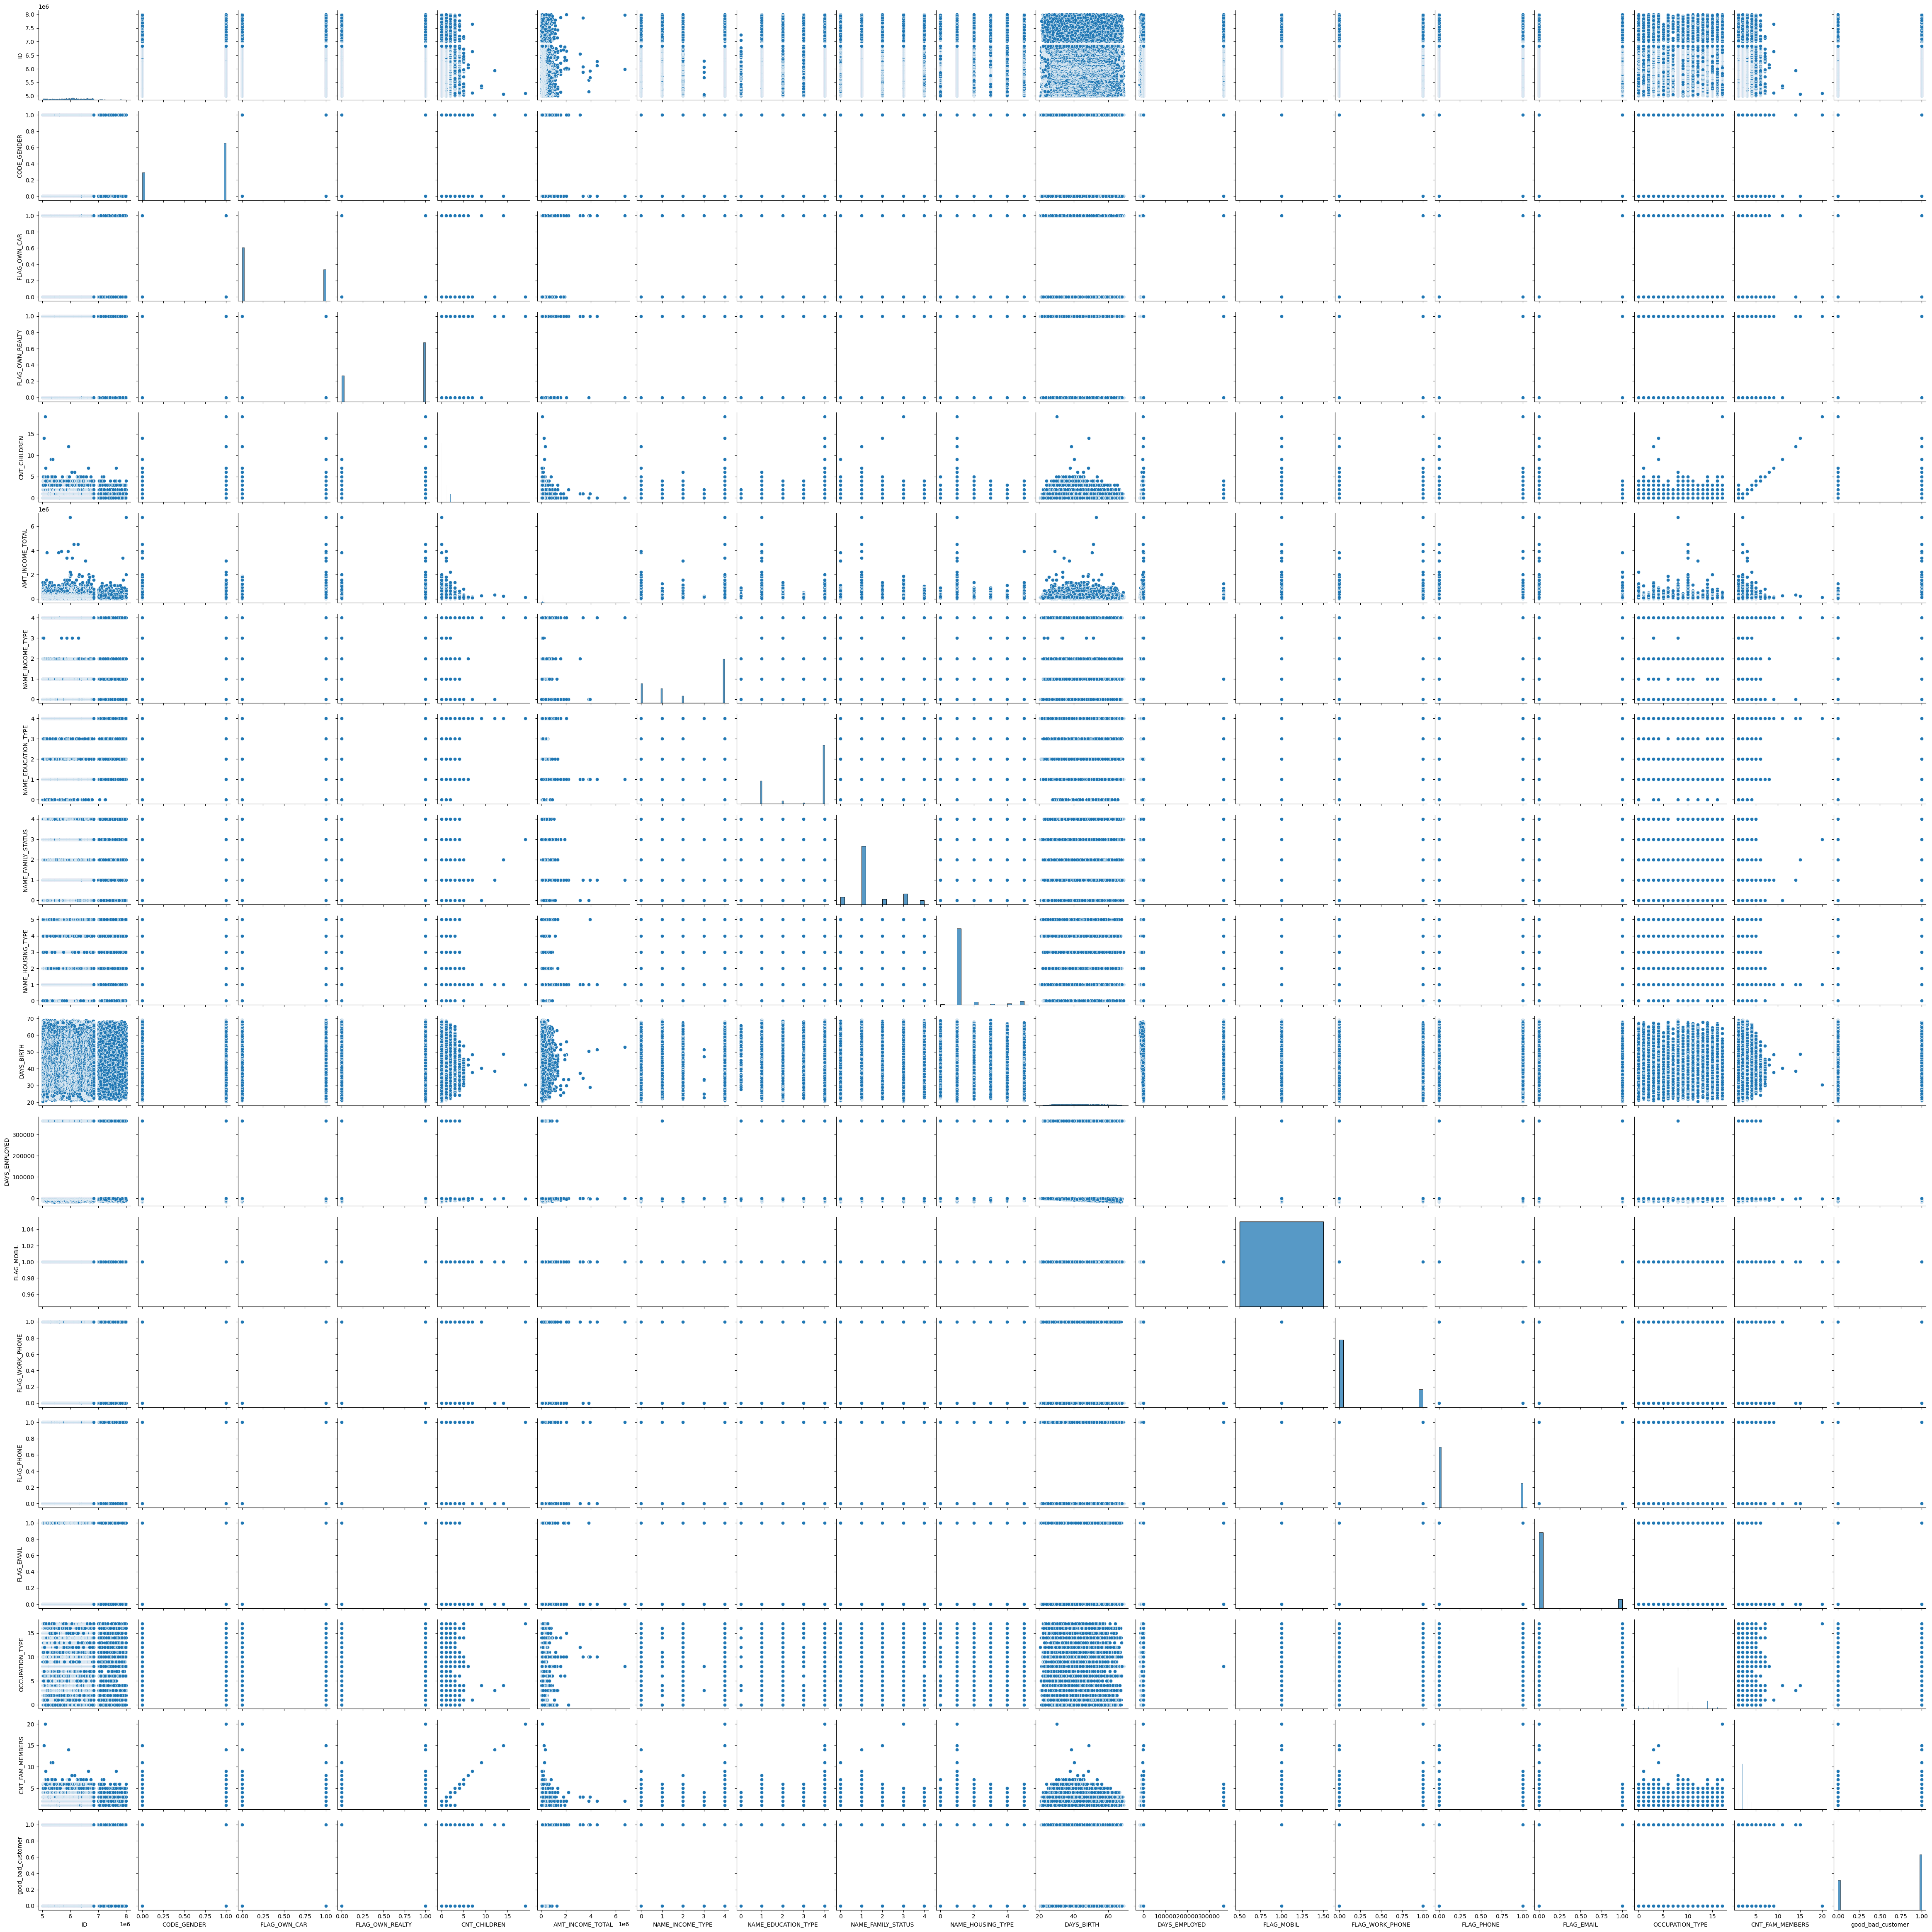

In [226]:
sns.pairplot(new_data)
plt.show()

## Feature Selection

In [228]:
feature_selection = SelectFromModel(ExtraTreesClassifier())
feature_selection.fit(x,y)

SelectFromModel(estimator=ExtraTreesClassifier())

In [230]:
feature_selection.get_feature_names_out()

array(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], dtype=object)

In [231]:
new_data.corr() ## Correlation of the data

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
ID                   1.000000    -0.000545      0.000063         0.042709   
CODE_GENDER         -0.000545     1.000000     -0.346580         0.041982   
FLAG_OWN_CAR         0.000063    -0.346580      1.000000        -0.001312   
FLAG_OWN_REALTY      0.042709     0.041982     -0.001312         1.000000   
CNT_CHILDREN        -0.005178    -0.086101      0.115138         0.001560   
AMT_INCOME_TOTAL     0.011179    -0.168807      0.188203         0.025443   
NAME_INCOME_TYPE     0.005595    -0.074654      0.043117        -0.044438   
NAME_EDUCATION_TYPE  0.003279    -0.002494     -0.094984         0.017136   
NAME_FAMILY_STATUS  -0.003128     0.082324     -0.120279        -0.003566   
NAME_HOUSING_TYPE   -0.002425    -0.062137      0.004950        -0.177292   
DAYS_BIRTH           0.004994     0.193781     -0.163770         0.106908   
DAYS_EMPLOYED       -0.002467     0.167255     -0.165372         0.064281   
FLAG_MOBIL                NaN          NaN           NaN              NaN   
FLAG_WORK_PHONE     -0.023319    -0.026050      0.008061        -0.177372   
FLAG_PHONE          -0.018992     0.022300     -0.006606        -0.078227   
FLAG_EMAIL           0.032875    -0.011416      0.038601         0.062483   
OCCUPATION_TYPE     -0.001098     0.030506     -0.038602         0.005891   
CNT_FAM_MEMBERS     -0.001862    -0.114188      0.156943         0.008070   
good_bad_customer    0.007006    -0.234507      0.209779        -0.020431   

                     CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
ID                      -0.005178          0.011179          0.005595   
CODE_GENDER             -0.086101         -0.168807         -0.074654   
FLAG_OWN_CAR             0.115138          0.188203          0.043117   
FLAG_OWN_REALTY          0.001560          0.025443         -0.044438   
CNT_CHILDREN             1.000000          0.019177          0.112210   
AMT_INCOME_TOTAL         0.019177          1.000000         -0.086957   
NAME_INCOME_TYPE         0.112210         -0.086957          1.000000   
NAME_EDUCATION_TYPE     -0.038015         -0.218186          0.068727   
NAME_FAMILY_STATUS      -0.153769         -0.010109         -0.049893   
NAME_HOUSING_TYPE        0.025838         -0.009043          0.033717   
DAYS_BIRTH              -0.349088         -0.053775         -0.231384   
DAYS_EMPLOYED           -0.241535         -0.141291         -0.368843   
FLAG_MOBIL                    NaN               NaN               NaN   
FLAG_WORK_PHONE          0.038418         -0.033635          0.150464   
FLAG_PHONE              -0.038266          0.004444          0.000755   
FLAG_EMAIL               0.028457          0.112139         -0.027910   
OCCUPATION_TYPE         -0.017462         -0.014957         -0.007850   
CNT_FAM_MEMBERS          0.884781          0.011454          0.107944   
good_bad_customer        0.127964          0.419967          0.144777   

                     NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
ID                              0.003279           -0.003128   
CODE_GENDER                    -0.002494            0.082324   
FLAG_OWN_CAR                   -0.094984           -0.120279   
FLAG_OWN_REALTY                 0.017136           -0.003566   
CNT_CHILDREN                   -0.038015           -0.153769   
AMT_INCOME_TOTAL               -0.218186           -0.010109   
NAME_INCOME_TYPE                0.068727           -0.049893   
NAME_EDUCATION_TYPE             1.000000           -0.003237   
NAME_FAMILY_STATUS             -0.003237            1.000000   
NAME_HOUSING_TYPE              -0.022056            0.041984   
DAYS_BIRTH                      0.158342            0.102399   
DAYS_EMPLOYED                   0.115119            0.133335   
FLAG_MOBIL                           NaN                 NaN   
FLAG_WORK_PHONE                -0.017077           -0.049790   
FLAG_PHONE                     -0.036501           -0.009599   
F

#### According to correlation and selectfrommodel the features will be taken.

In [247]:
x = new_data[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]

## Train_test_split

In [248]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

## Train Model

In [249]:
random_model = RandomForestClassifier().fit(x_train,y_train)

In [250]:
random_model.score(x_test,y_test)

1.0

In [251]:
random_model.score(x_train,y_train)

1.0

In [252]:
y_pred = random_model.predict(x_test)

## Classification Matrix

In [253]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45795
           1       1.00      1.00      1.00     85773

    accuracy                           1.00    131568
   macro avg       1.00      1.00      1.00    131568
weighted avg       1.00      1.00      1.00    131568

